## Analysis of solutions to Schrodinger equation for Harmonic Oscillator(Griffiths):
Differential Equation:
$$\frac{d^2\psi}{du^2} = (u^2 - k)\psi,\quad u = \sqrt{\frac{m\omega}{\hbar}}x,\quad k = \frac{2E}{\hbar \omega}$$
Let $\psi(u) = h(u)e^{-u^2 /2}$, then:
$$\frac{d^2 h}{du^2} - 2u\frac{dh}{du} + (k-1)h = 0$$
Decomposition into system of equations:
$$\frac{dh}{du} = g,\quad \frac{dg}{du} = 2ug - (k-1)h$$
$$\vec r = [h,g]\Rightarrow \frac{d\vec r}{du} = [g,2ug-(k-1)h]$$

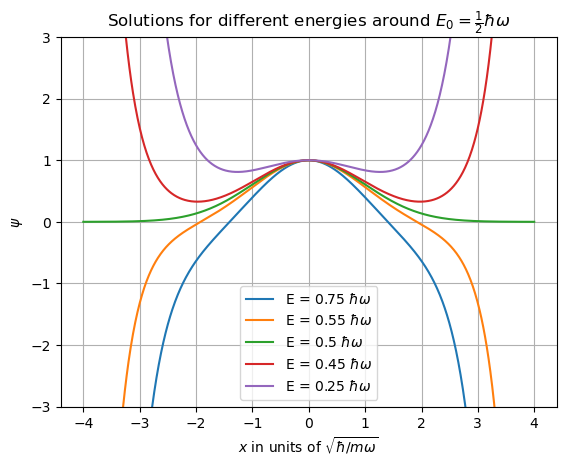

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,u,k):
    h = r[0]; g = r[1]
    dhdu = g; dgdu = 2*u*g - (k-1)*h
    return np.array([dhdu,dgdu],float)

upos = np.linspace(0,4,500)
uneg = -np.copy(upos[::-1])
u = np.concatenate((uneg,upos))

kvals = np.array([1.5,1.1,1,0.9,0.5],float)
#np.array([1.5,1.1,1,0.9,0.5],float)
rinit = np.array([1,0])
plt.ylim((-3,3))
for k in kvals:
    r = odeint(f,rinit,upos,args = (k,))
    hpos = r[:,0];hneg = np.copy(hpos[::-1])
    h = np.concatenate((hneg,hpos))
    psi = h*np.exp(-(u**2)/2)
    plt.plot(u,psi,label = 'E = '+str(k/2)+r'$\ \hbar \omega$')

plt.ylabel(r'$\psi$')
plt.xlabel(r'$x$ in units of $\sqrt{\hbar /m\omega}$')
plt.title('Solutions for different energies around '+r'$E_0 = \frac{1}{2}\hbar \omega$')
plt.legend();plt.grid()
plt.show()

## Time Independent (stationary) Wavefunctions:
$$\psi_n = \frac{1}{(\pi a^2)^{1/4}}\frac{1}{\sqrt{2^n n!}}\ H_n(u)\ e^{u^2 /2}$$
$$a = \sqrt{\frac{\hbar}{m\omega}},\quad u = \frac{x}{a}$$
Classical amplitude of oscillations:
$$A = a \sqrt{2n+1}$$

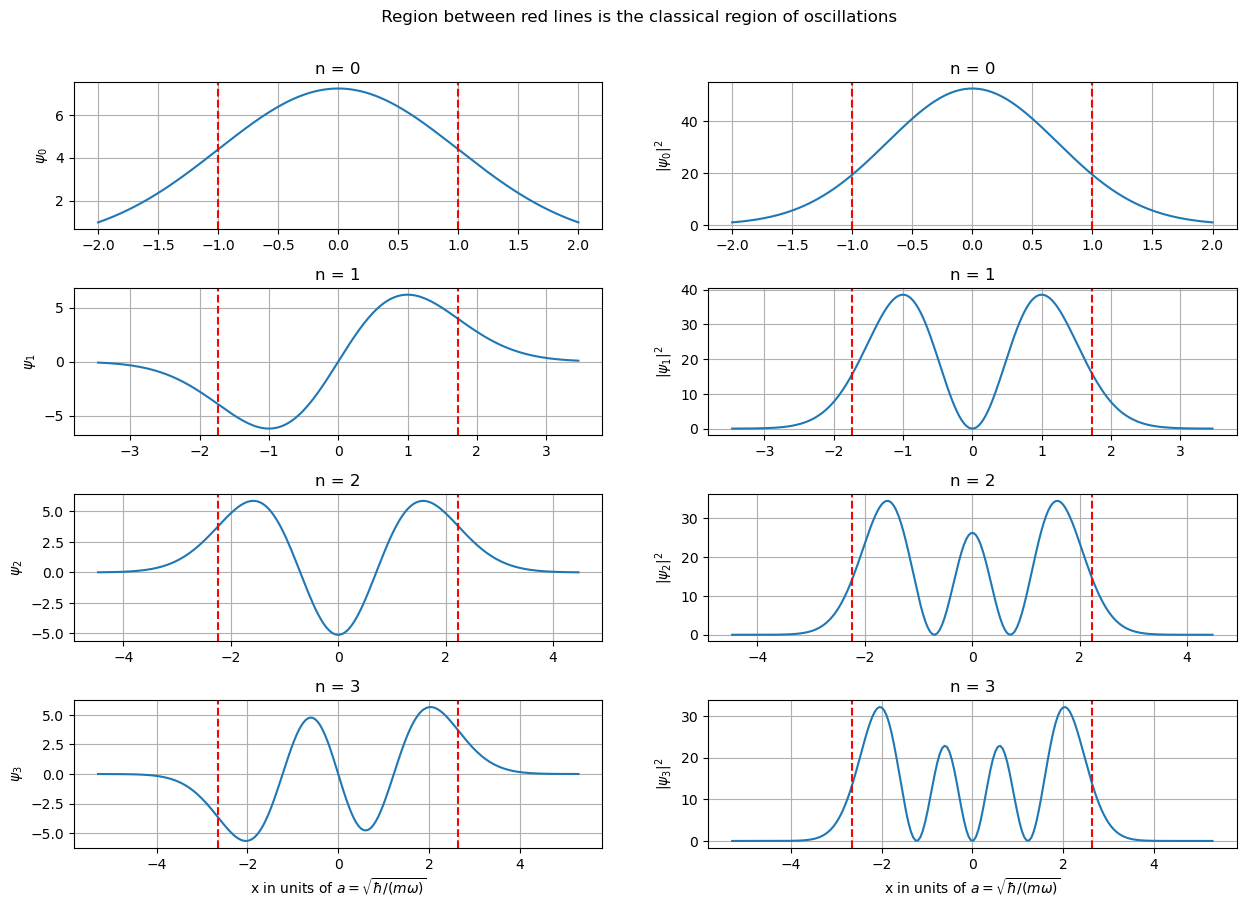

Text(0.5, 0, 'x in units of $a=\\sqrt{\\hbar/(m\\omega)}$')

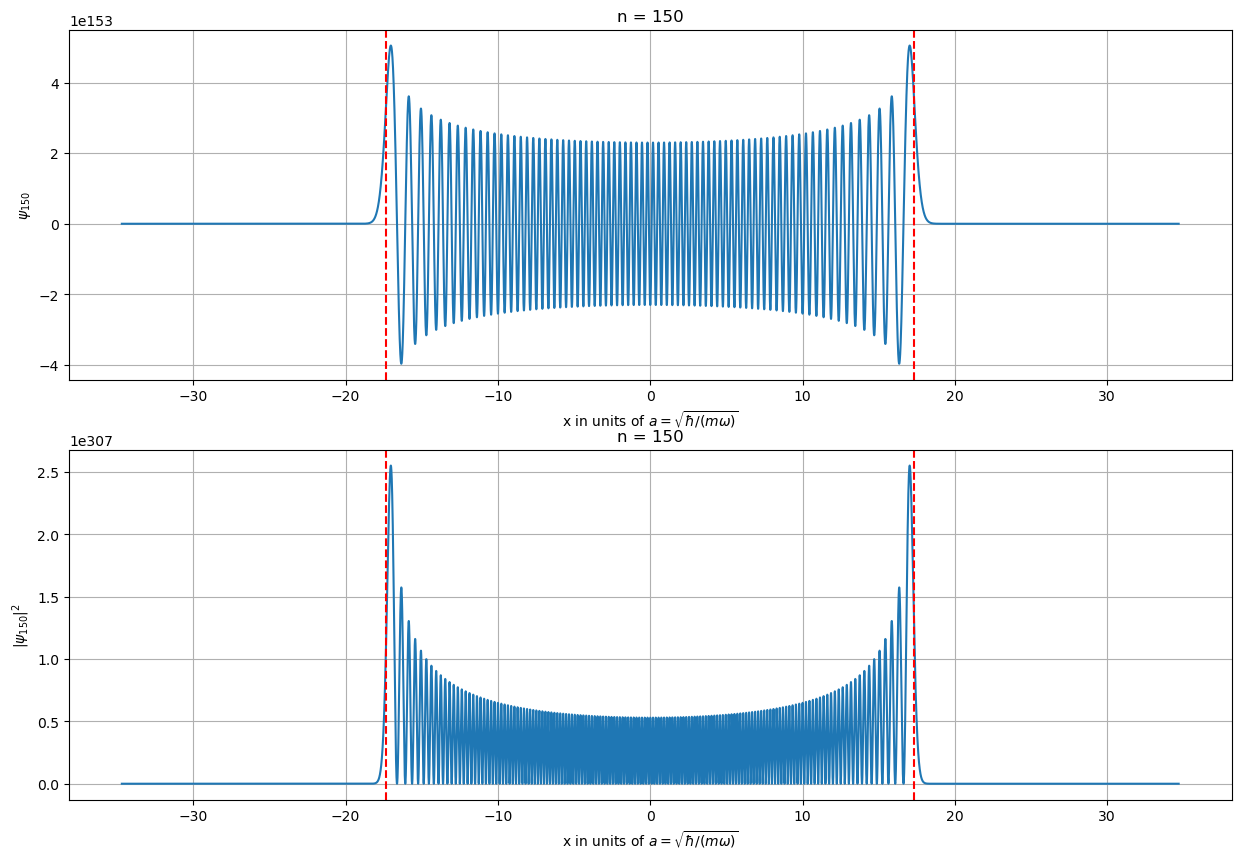

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Define nth Hermite polynomial
def H(n,x):
    if n == 0:
        return 1+0*x
    elif n == 1:
        return 2*x
    Hnminus2 = 1+0*x
    Hnminus1 = 2*x
    for i in range(2,n+1):
        Hn = 2*x*Hnminus1 - 2*(i-1)*Hnminus2
        Hnminus2,Hnminus1 = Hnminus1,Hn
    return Hn

# Constants
N = 3    # Largest state
hbar = 1.0546E-34    # Joules*sec
m = 9.109E-31    # Mass of electron in Kg
omega = 1.0    # sec^-1
a = np.sqrt(hbar/(m*omega))

fig1 = plt.figure(figsize = (15,3*(N+1)))
for n in range(N+1):
    Anbya = np.sqrt(2*n + 1)
    u = np.linspace(-2*Anbya,2*Anbya,200)
    psin = H(n,u)*np.exp(-(u**2)/2)/(((np.pi*(a**2))**0.25)*np.sqrt((2**n)*factorial(n)))
    
    ax1 = fig1.add_subplot(N+2,2,2*n+1)
    ax1.plot(u,psin)
    ax1.axvline(x = -Anbya, ls = '--',color = 'r');ax1.axvline(x = Anbya, ls = '--',color = 'r')
    ax1.set_title('n = '+str(n))
    ax1.set_ylabel(r'$\psi_{'+str(n)+'}$')
    ax1.grid()
    
    ax2 = fig1.add_subplot(N+2,2,2*n+2)
    ax2.plot(u,psin**2)
    ax2.axvline(x = -Anbya, ls = '--',color = 'r');ax2.axvline(x = Anbya, ls = '--',color = 'r')
    ax2.set_title('n = '+str(n))
    ax2.set_ylabel(r'$|\psi_{'+str(n)+'}|^2$')
    ax2.grid()
    
ax1.set_xlabel(r'x in units of $a=\sqrt{\hbar/(m\omega)}$')
ax2.set_xlabel(r'x in units of $a=\sqrt{\hbar/(m\omega)}$')

fig1.suptitle(' Region between red lines is the classical region of oscillations')
fig1.subplots_adjust(top = 0.92, hspace = 0.4)
plt.show()

fig2 = plt.figure(figsize = (15,10))
n = 150
Anbya = np.sqrt(2*n + 1)
u = np.linspace(-2*Anbya,2*Anbya,100000)
psin = H(n,u)*np.exp(-(u**2)/2)#/(((np.pi*(a**2))**0.25)*np.sqrt((2**n)*factorial(n)))
    
ax1 = fig2.add_subplot(2,1,1)
ax1.plot(u,psin)
ax1.axvline(x = -Anbya, ls = '--',color = 'r');ax1.axvline(x = Anbya, ls = '--',color = 'r')
ax1.set_title('n = '+str(n))
ax1.set_ylabel(r'$\psi_{'+str(n)+'}$')
ax1.grid()
    
ax2 = fig2.add_subplot(2,1,2)
ax2.plot(u,psin**2)
ax2.axvline(x = -Anbya, ls = '--',color = 'r');ax2.axvline(x = Anbya, ls = '--',color = 'r')
ax2.set_title('n = '+str(n))
ax2.set_ylabel(r'$|\psi_{'+str(n)+'}|^2$')
ax2.grid()
    
ax1.set_xlabel(r'x in units of $a=\sqrt{\hbar/(m\omega)}$')
ax2.set_xlabel(r'x in units of $a=\sqrt{\hbar/(m\omega)}$')